### Eda Steam Games ###

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import colormap as cmap
from textblob import TextBlob
import warnings
import herramientas
warnings.filterwarnings("ignore")

In [16]:
pip list

Package            VersionNote: you may need to restart the kernel to use updated packages.

------------------ ------------
annotated-types    0.7.0
anyio              4.4.0
asttokens          2.4.1
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
colorama           0.4.6
colormap           1.1.0
comm               0.2.2
contourpy          1.2.1
cramjam            2.8.4
cycler             0.12.1
debugpy            1.8.1
decorator          5.1.1
distlib            0.3.8
et-xmlfile         1.1.0
executing          2.0.1
fastapi            0.112.1
fastparquet        2024.5.0
filelock           3.13.4
fonttools          4.51.0
fsspec             2024.9.0
h11                0.14.0
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jason              0.1.7
jedi               0.19.1
joblib             1.4.2
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
matplotlib         3.8.4
matplotlib-inline  0.1.6
nest-asyn

Se inicia el análisis exploratorio del conjunto de datos ‘steam_games’, ya procesado mediante ETL. A continuación, se presenta un primer acercamiento a sus características.

In [17]:
df_games = pd.read_parquet('output_steam_games_limpio.parquet')


In [18]:
df_games

,id,app_name,developer,genres,price,release_date
0,761140,Lost Summoner Kitty,Kotoshiro,Action,4.99,2018
1,643980,Ironbound,Secret Level SRL,Indie,0.00,2018
2,670290,Real Pool 3D - Poolians,Poolians.com,Casual,0.00,2017
3,767400,弹炸人2222,彼岸领域,Action,0.99,2017
4,773570,Log Challenge,None,Action,2.99,None
...,...,...,...,...,...,...
32130,773640,Colony On Mars,"Nikita ""Ghost_RUS""",Casual,1.99,2018
32131,733530,LOGistICAL: South Africa,Sacada,Casual,4.99,2018
32132,610660,Russian Roads,Laush Dmitriy Sergeevich,Indie,1.99,2018
32133,658870,EXIT 2 - Directions,"xropi,stev3ns",Casual,4.99,2017


 Se llevó a cabo una inspección inicial de los tipos de datos y la presencia de valores nulos.

In [19]:
print(f'La cantidad de registros que hay son: {df_games.shape[0]}')
herramientas.tipo_datos(df_games)

La cantidad de registros que hay son: 32135


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,id,object,99.99,0.01,2
1,app_name,object,99.99,0.01,2
2,developer,object,89.73,10.27,3299
3,genres,object,99.57,0.43,139
4,price,float64,96.35,3.65,1173
5,release_date,object,93.25,6.75,2168


Se llevó a cabo un análisis preliminar de las columnas 'id', 'app_name' y 'title' del conjunto de datos. La columna 'id' funciona como clave primaria, asignando un identificador único a cada registro y permitiendo así la identificación individual de cada juego. Las columnas 'app_name' y 'title', aunque contienen información textual sobre la aplicación y el juego, respectivamente, no fueron objeto de un análisis profundo en esta etapa, dado que su valor agregado en términos de inferencias estadísticas o patrones es limitado. No obstante, la columna 'id' resultó ser de gran utilidad para calcular el tamaño total del conjunto de datos, es decir, el número total de juegos presentes en la base.



In [20]:
total_juegos = len(df_games['id'].unique())
print(f"El total de juegos que hay registrados son: {total_juegos}")

El total de juegos que hay registrados son: 32133


procedemos a trabajar sobra la columna "genres"

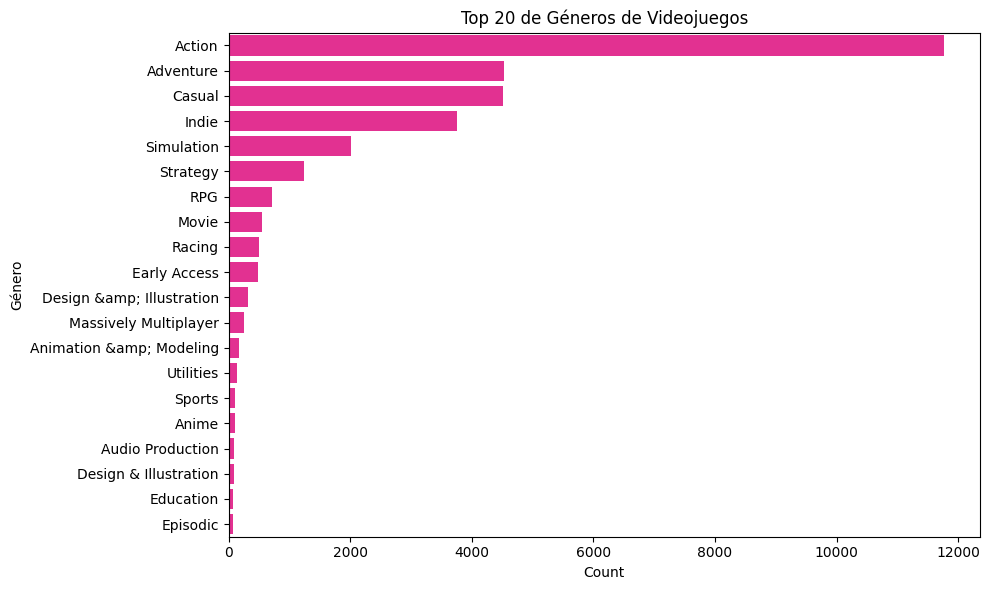

In [27]:
# Calculamos la frecuencia de cada género
cuantos_genre = df_games['genres'].value_counts()

top_genres = cuantos_genre.head(20) #apartamos los 20 generos mas cmunes

top_genres_df = pd.DataFrame({'Género': top_genres.index, 'Count': top_genres.values})# creamos un df con los generos y sus frecuencias

# Graficamos
plt.figure(figsize=(10, 6))
sns.set_palette(["#FF1493"])  # Establecemos la paleta a fucsia
sns.barplot(data=top_genres_df, x='Count', y='Género')
plt.xlabel('Count')
plt.ylabel('Género')
plt.title('Top 20 de Géneros de Videojuegos')
plt.tight_layout()
plt.show()

In [31]:
# calculamos el porcentaje de cada género de juego
Porcentaje = herramientas.resumen_porcentajes(df_games, 'genres')
Porcentaje.head(10)

,Cantidad,Porcentaje
genres,,
Action,11770,36.63
Adventure,4530,14.10
Casual,4521,14.07
Indie,3763,11.71
Simulation,2019,6.28
Strategy,1245,3.87
RPG,718,2.23
Movie,552,1.72
Racing,504,1.57


In [32]:
# calculamos los porcentajes de las fechas de lanzamiento y obtenemos los primeros 10 resultados
herramientas.resumen_porcentajes(df_games, 'release_date')[:10]

,Cantidad,Porcentaje
release_date,,
2017,9595,29.86
2016,6943,21.61
2015,4952,15.41
2014,2844,8.85
2013,1552,4.83
2012,1193,3.71
2011,590,1.84
2010,442,1.38
2009,341,1.06


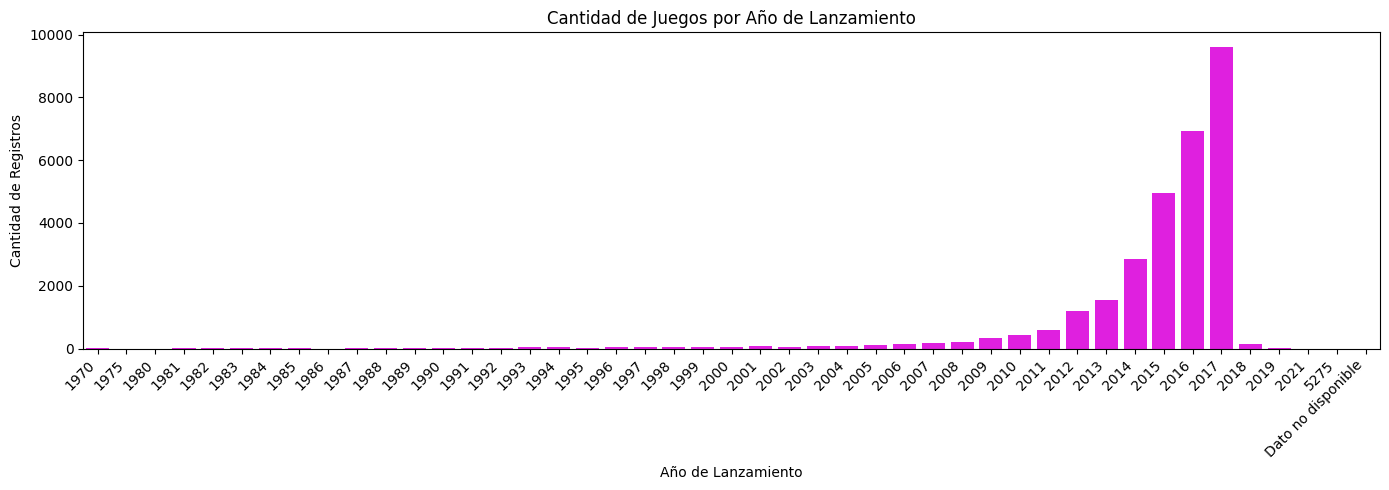

In [34]:
# frecuencia por año
cuento_años = df_games['release_date'].value_counts()

# Ordenamos valores para que 'Datos no disponibles' queden al principio o al final
conteo_anios = cuento_años.reindex(['Dato no disponible'] + list(cuento_años.index))
# Ordena los valores por año
conteo_anios = conteo_anios.sort_index()

# Crear la gráfica de barras con color fucsia
plt.figure(figsize=(14, 5))
sns.barplot(x=conteo_anios.index, y=conteo_anios.values, palette={'fuchsia'})
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Juegos por Año de Lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Mediante técnicas de análisis de texto se llevará a cabo una investigación profunda de las columnas 'publisher' y 'developer'.

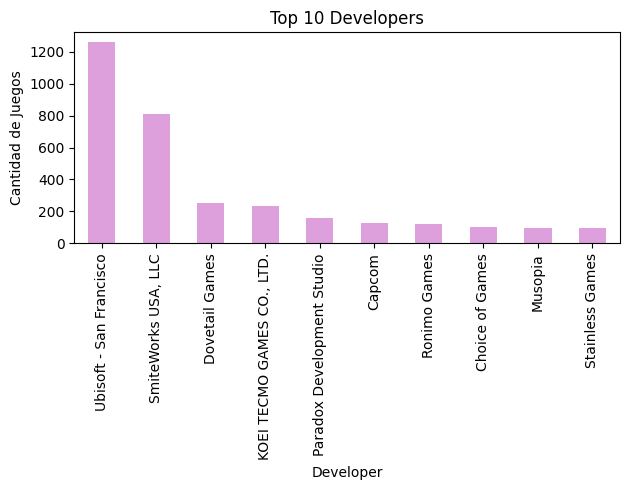

In [35]:
# Contamos cantidad de juegos por developer
conteo_developer = df_games['developer'].value_counts()

# Creamos una figura con dos subplots uno al lado del otro
plt.figure(figsize=(12, 5))

# Segundo subplot para los developers
plt.subplot(1, 2, 2)
conteo_developer[:10].plot(kind='bar', color='#DDA0DD')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

# Muestra
plt.tight_layout()
plt.show()

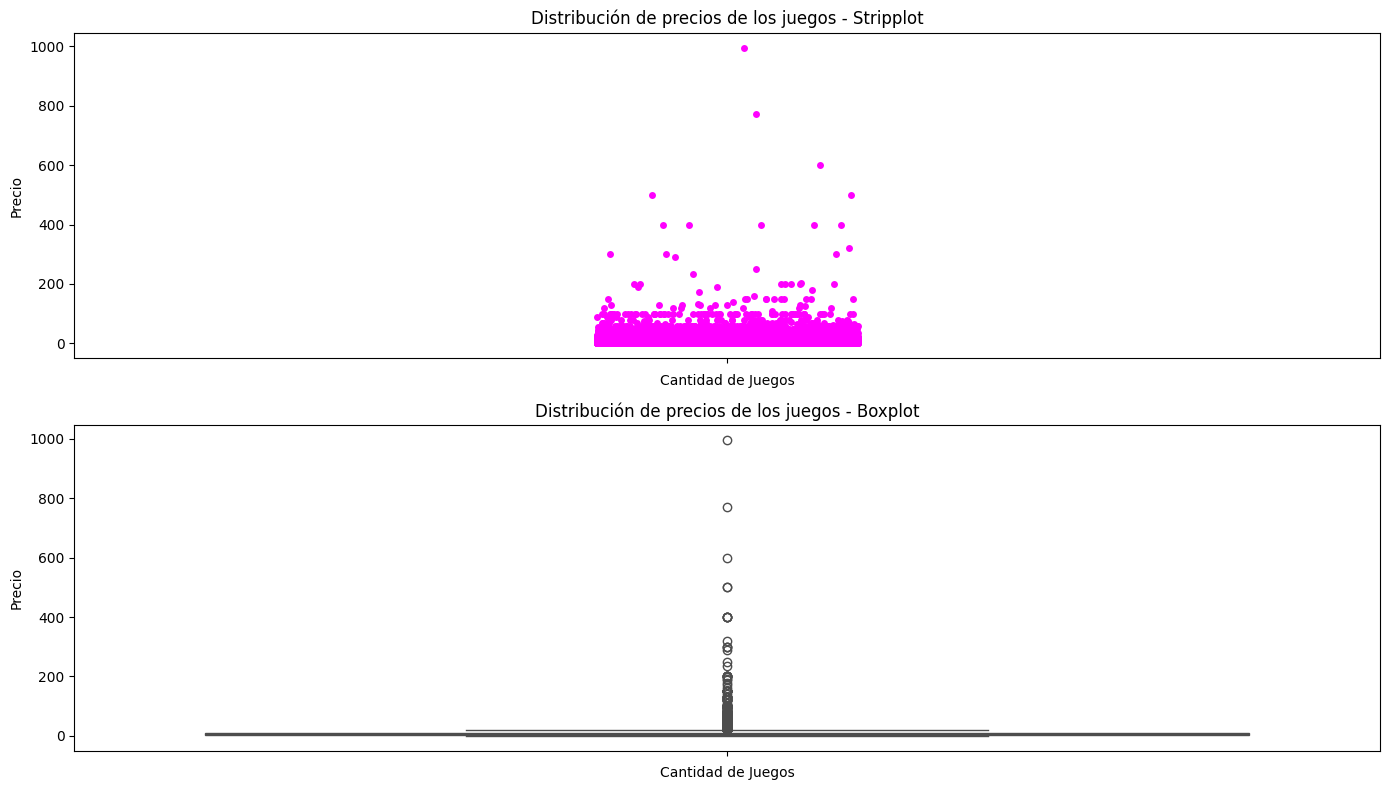

In [39]:
# sacamos los precios para cada juego y hacemos un df
precio_unicos = df_games['price'].unique()
df_precio_unicos = df_games['price']
df_precios_uni = pd.DataFrame(df_precio_unicos, columns=['price'])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# Stripplot con color fucsia
sns.stripplot(data=df_precios_uni, y='price', ax=ax1, color="#FF00FF")
ax1.set_ylabel('Precio')
ax1.set_xlabel('Cantidad de Juegos')
ax1.set_title('Distribución de precios de los juegos - Stripplot')

# Boxplot con color fucsia
sns.boxplot(data=df_precios_uni, y='price', ax=ax2, color="#FF00FF")
ax2.set_ylabel('Precio')
ax2.set_xlabel('Cantidad de Juegos')
ax2.set_title('Distribución de precios de los juegos - Boxplot')

# Muestra
plt.tight_layout()
plt.show()

In [41]:
# calculamos los precios mínimo, máximo, mediano y promedio de una columna 'price' 
minimo = df_precios_uni['price'].min()
maximo = df_precios_uni['price'].max()
mediana = df_precios_uni['price'].median()
promedio = df_precios_uni['price'].mean()

print(f"Precio mínimo: {minimo}")
print(f"Precio máximo: {maximo}")
print(f"Mediana de precios: {mediana}")
print(f"Promedio de precios: {promedio}")

Precio mínimo: 0.0
Precio máximo: 995.0
Mediana de precios: 4.99
Promedio de precios: 8.808433563723273


In [42]:
# calculamos valores estadísticos: primer cuartil, mediana (segundo cuartil), tercer cuartil y rango intercuartílico (IQR).
cuartiles = df_precios_uni['price'].quantile([0.25, 0.5, 0.75])
precio_cuartil1 = cuartiles[0.25]
precio_cuartil2 = cuartiles[0.5]
precio_cuartil3 = cuartiles[0.75]
precio_IQR = precio_cuartil3 - precio_cuartil1

print(f"Precio primer cuartil: {precio_cuartil1}")
print(f"Precio segundo cuartil (mediana): {precio_cuartil2}")
print(f"Precio tercer cuartil: {precio_cuartil3}")
print(f"Rango intercuartílico (IQR): {precio_IQR}")

Precio primer cuartil: 2.99
Precio segundo cuartil (mediana): 4.99
Precio tercer cuartil: 9.99
Rango intercuartílico (IQR): 7.0


### Eda User Reviews ###

In [43]:
df_reviews = pd.read_parquet("user_reviews_analisis_ de_sentimientos.parquet")
df_reviews

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review,sentiment_analysis
0,76561197970982479,None,"Posted November 5, 2011.",None,1250,No ratings yet,True,2,2
1,76561197970982479,None,"Posted July 15, 2011.",None,22200,No ratings yet,True,2,2
2,76561197970982479,None,"Posted April 21, 2011.",None,43110,No ratings yet,True,2,2
3,js41637,None,"Posted June 24, 2014.",None,251610,15 of 20 people (75%) found this review helpful,True,2,2
4,js41637,None,"Posted September 8, 2013.",None,227300,0 of 1 people (0%) found this review helpful,True,2,2
...,...,...,...,...,...,...,...,...,...
59328,76561198312638244,None,Posted July 10.,None,70,No ratings yet,True,2,2
59329,76561198312638244,None,Posted July 8.,None,362890,No ratings yet,True,2,2
59330,LydiaMorley,1 person found this review funny,Posted July 3.,None,273110,1 of 2 people (50%) found this review helpful,True,2,2
59331,LydiaMorley,None,Posted July 20.,None,730,No ratings yet,True,1,1


Se procede a una exhaustiva revisión de los tipos de datos y a la cuantificación de los valores nulos, si estos existieran.

In [44]:
# calculamosla cantidad de registros
print(f'La cantidad de registros que hay son: {df_reviews.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
herramientas.tipo_datos(df_reviews)

La cantidad de registros que hay son: 59333


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,object,100.00,0.00,0
1,funny,object,13.74,86.26,51182
2,posted,object,99.95,0.05,28
3,last_edited,object,10.35,89.65,53193
4,item_id,object,99.95,0.05,28
5,helpful,object,99.95,0.05,28
6,recommend,bool,100.00,0.00,0
7,review,int64,100.00,0.00,0
8,sentiment_analysis,int64,100.00,0.00,0


Mediante la aplicación de técnicas de análisis de sentimiento a la columna 'sentiment_analysis' y la cuantificación de las recomendaciones en la columna 'reviews_recommend', se logró obtener una visión cuantitativa y cualitativa de la percepción de los usuarios.

In [45]:
# Se obtiene un resumen de los porcentajes de la columna 'sentiment_analysis'
herramientas.resumen_porcentajes(df_reviews, 'sentiment_analysis')

,Cantidad,Porcentaje
sentiment_analysis,,
2,37706,63.55
1,13210,22.26
0,8417,14.19


In [46]:
# Se obtiene un resumen de los porcentajes de las recomendaciones ('recommend')
herramientas.resumen_porcentajes(df_reviews, 'recommend')

,Cantidad,Porcentaje
recommend,,
True,52473,88.44
False,6860,11.56


In [47]:
 #Cuantos usuarios que dieron su opinion
print(f"Cantidad de usuarios únicos que opinaron: {len(df_reviews['user_id'].unique())}")

Cantidad de usuarios únicos que opinaron: 25485


A continuación se presenta un análisis exhaustivo de la distribución temporal de los comentarios, desglosada por mes y año. 

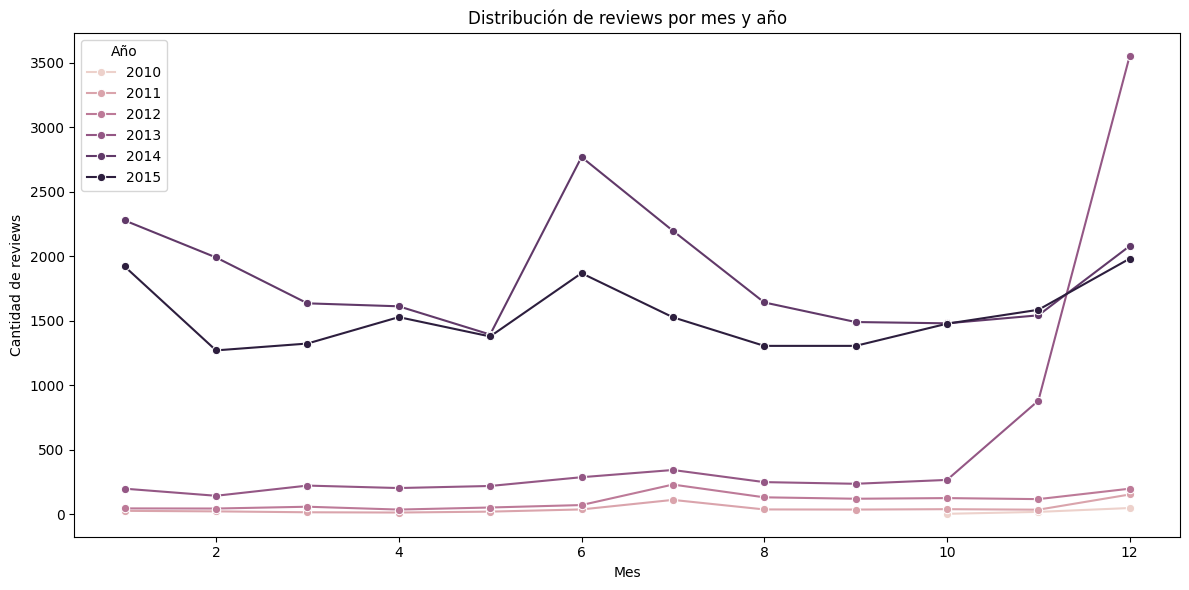

In [48]:
# Extraemos y pasamos las fechas al formato deseado
df_reviews["posted"] = df_reviews["posted"].str.extract(r'Posted (.+?)\.')
df_reviews["posted"] = pd.to_datetime(df_reviews["posted"], format="%B %d, %Y", errors='coerce')

# Elimino filas con fechas que no se pudieron convertir
df_reviews = df_reviews.dropna(subset=['posted'])

# Agrego columnas para el mes y el año
df_reviews['month'] = df_reviews['posted'].dt.month
df_reviews['year'] = df_reviews['posted'].dt.year

# Calculamos cantidad de reviews por mes y año
df_counts = df_reviews.groupby(['year', 'month']).size().reset_index(name='Cantidad de reviews')

# Graficamos
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_counts, x="month", y="Cantidad de reviews", hue="year", marker='o')
plt.xlabel('Mes')
plt.ylabel('Cantidad de reviews')
plt.title('Distribución de reviews por mes y año')
plt.legend(title='Año')
plt.tight_layout()
plt.show()

### Eda User Items ###

In [49]:
df_items = pd.read_parquet("australian_users_items_limpio.parquet")

df_items.head()

,user_id,items_count,item_id,playtime_forever
0,76561197970982479,277,10,6.0
1,76561197970982479,277,20,0.0
2,76561197970982479,277,30,7.0
3,76561197970982479,277,40,0.0
4,76561197970982479,277,50,0.0


In [50]:
# calculamos los registros
print(f'La cantidad de registros que hay son: {df_items.shape[0]}')
herramientas.tipo_datos(df_items)# revisamos tipos de datos y nulos

La cantidad de registros que hay son: 5170015


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,object,100.00,0.00,0
1,items_count,int64,100.00,0.00,0
2,item_id,object,99.67,0.33,16806
3,playtime_forever,float64,99.67,0.33,16806


La columna 'playtime_forever' se erige como un indicador clave para comprender la dinámica de uso de la plataforma. Al explorar esta variable, se busca develar los significados encubiertos al tiempo dedicado al juego, y analizar cómo esta dimensión temporal influye en la experiencia del usuario y en la construcción de comunidades virtuales en torno al juego.

<Figure size 1400x400 with 0 Axes>

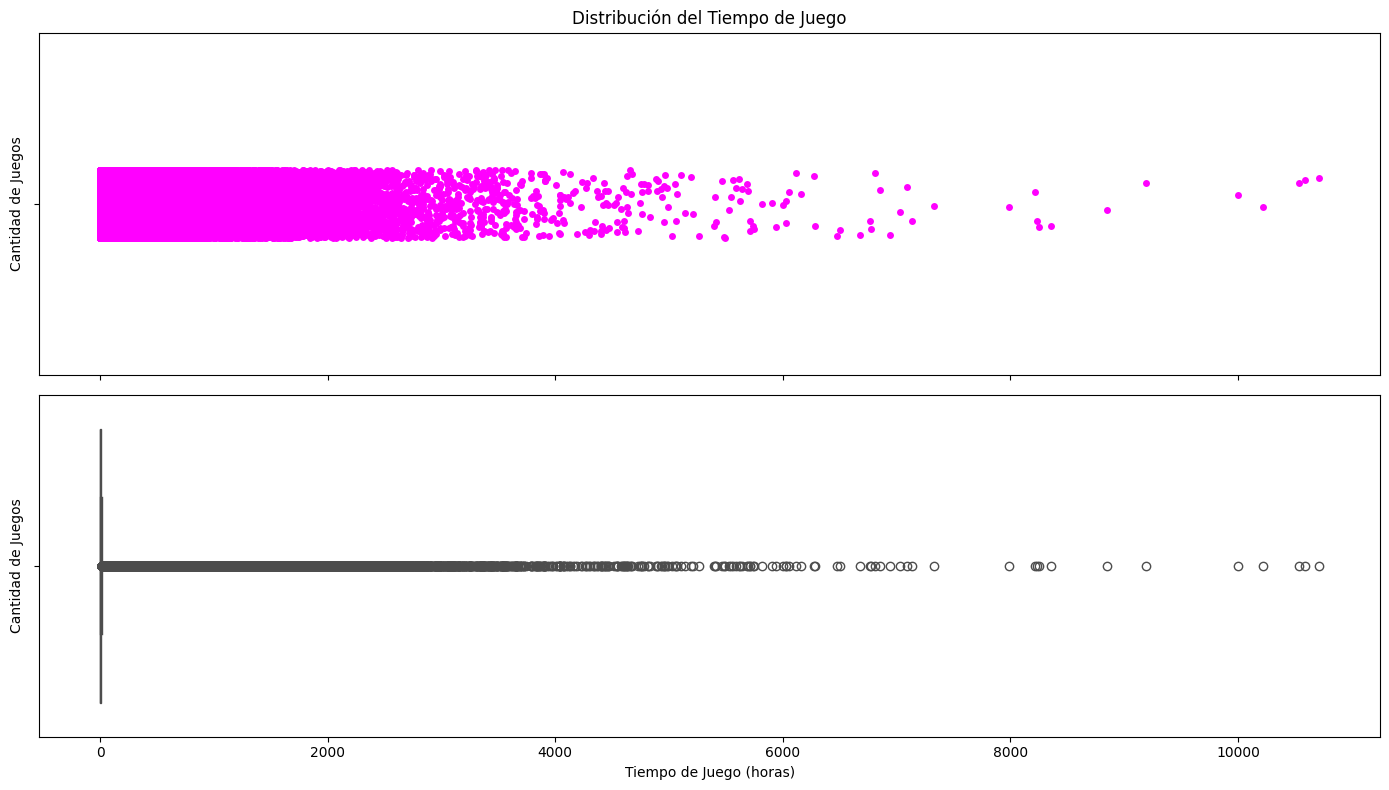

In [55]:
df_items['playtime_hours'] = df_items['playtime_forever'] / 60

figura= plt.figure(figsize=(14, 4))


# paleta fucsia
sns.set_palette(["#FF00FF"])

# Grafica
fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

sns.stripplot(data=df_items, x='playtime_hours', ax=axs[0])
axs[0].set_xlabel('Tiempo de Juego (horas)')
axs[0].set_ylabel('Cantidad de Juegos')
axs[0].set_title('Distribución del Tiempo de Juego')

sns.boxplot(data=df_items, x='playtime_hours', ax=axs[1])
axs[1].set_xlabel('Tiempo de Juego (horas)')
axs[1].set_ylabel('Cantidad de Juegos')

#mostramos
plt.tight_layout()
plt.show()


In [56]:
# tiempo mínimo, máximo, mediana y promedio de juego en horas 
tiempo_min = df_items['playtime_hours'].min()
tiempo_max = df_items['playtime_hours'].max()
tiempo_mediana = df_items['playtime_hours'].median()
tiempo_promedio = df_items['playtime_hours'].mean()

print(f"Tiempo mínimo de juego (horas): {tiempo_min}")
print(f"Tiempo máximo de juego (horas): {tiempo_max}")
print(f"Mediana del tiempo de juego (horas): {tiempo_mediana}")
print(f"Promedio del tiempo de juego (horas): {tiempo_promedio}")

Tiempo mínimo de juego (horas): 0.0
Tiempo máximo de juego (horas): 10712.883333333333
Mediana del tiempo de juego (horas): 0.5666666666666667
Promedio del tiempo de juego (horas): 16.524919013246567


In [57]:
# calculamos cuartiles y rango intercuartílico del tiempo de juego en horas, y promedio del tiempo de juego
cuartiles_tiempo_de_juego = df_items['playtime_hours'].quantile([0.25, 0.5, 0.75])
tiempo_cuartil1 = cuartiles_tiempo_de_juego[0.25]
tiempo_cuartil2 = cuartiles_tiempo_de_juego[0.5]
tiempo_cuartil3 = cuartiles_tiempo_de_juego[0.75]
tiempo_IQR = tiempo_cuartil3 - tiempo_cuartil1

print(f"Cuartil 1 del tiempo de juego (horas): {tiempo_cuartil1}")
print(f"Cuartil 2 del tiempo de juego (horas): {tiempo_cuartil2}")
print(f"Cuartil 3 del tiempo de juego (horas): {tiempo_cuartil3}")
print(f"Rango intercuartílico (IQR) del tiempo de juego (horas): {tiempo_IQR}")

Cuartil 1 del tiempo de juego (horas): 0.0
Cuartil 2 del tiempo de juego (horas): 0.5666666666666667
Cuartil 3 del tiempo de juego (horas): 5.916666666666667
Rango intercuartílico (IQR) del tiempo de juego (horas): 5.916666666666667


La variable "items_count" fue analizada con el objetivo de cuantificar el nivel de consumo de videojuegos por parte de los usuarios. Esta métrica refleja el número total de juegos adquiridos o utilizados por cada individuo en el período de estudio.


In [58]:
# Agrupamos cantidad de items por usuaraio, lo convertimos a df y los ordenamos de mayor a menor
items_count_user = df_items.groupby('user_id')['items_count'].unique().explode()
items_count_user = pd.DataFrame(items_count_user)
items_count_user_o = items_count_user.sort_values('items_count', ascending=False)

figura = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=items_count_user_o, x='items_count', ax=ax1, color='#3CB371')
ax1.set_xlabel('items_count') ; ax1.set_title('Cantidad de items por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=items_count_user_o, x='items_count', ax=ax2, color='#BA55D3' )
ax2.set_xlabel('items_count')

# Muestra
plt.tight_layout()
plt.show()

<Figure size 1400x400 with 0 Axes>